Recurrent Neutral Networks

https://en.wikipedia.org/wiki/Recurrent_neural_network

1. Einführung in RNNs
Ziel:

Das Konzept von RNNs und die Besonderheiten gegenüber Feed-Forward Neural Networks (FFNN) zu erkennen.



Inhalt:

- Was sind RNNs?:

  - RNNs sind neuronale Netze, die für die Arbeit mit Sequenzdaten wie Zeitreihen, Text oder Audio entwickelt wurden.
  - Sie besitzen die Fähigkeit, Informationen über Sequenzen hinweg beizubehalten und zu verarbeiten, da die Ausgaben früherer Schritte als Eingaben für spätere Schritte genutzt werden.

- Unterschied zu FFNNs:

  - In Feed-Forward-Netzen gibt es keinen Zusammenhang zwischen den Eingaben über verschiedene Zeitpunkte hinweg.
  - In RNNs gibt es Verbindungen von einem Schritt zum nächsten, sodass das Netzwerk Informationen früherer Schritte "merkt".

- Anwendungsgebiete von RNNs:

  - Zeitreihenanalyse (z. B. Aktienkurse, Wetterdaten)
  - Spracherkennung
  - Maschinelle Übersetzung
  - Textvorhersage

- Visualisierung/Beispiele:


![Recurrent Neutral Network](figure_rnn_2.jpg)


Bild ist aus file:///C:/Users/geise/OneDrive/Desktop/JOB_ENDERS_2024/KURS_1_2_PCED_2024/Literatur_2024/ISLP_python_2024.pdf

Erläuterung: RNN ist als eine Einheit darstellt. Die Eingaben sind mit X gegeben, A sind die Aktivierungsfunktionen, Die Gewichte sind mit W, U und B gegeben. Die Ausgabe mit O.






2. Theorie: Aufbau und Architektur von RNNs (10 Minuten)
Ziel:
Verstehen, wie RNNs aufgebaut sind und wie sie funktionieren.

Inhalt:
Architektur eines RNN:

Das RNN verarbeitet Sequenzen Schritt für Schritt und nutzt dabei vergangene Informationen durch "Recurrent Connections".
Verarbeitung von Sequenzen:

In jedem Schritt erhält das RNN sowohl eine Eingabe der aktuellen Sequenz als auch die Ausgabe des vorherigen Schritts.
Mathematische Grundlagen:




Die versteckte Zustandsvariable $ h_t $ eines RNN zu einem Zeitpunkt $ t $ wird berechnet als:

$$
h_t = f(W_h \cdot h_{t-1} + W_x \cdot x_t + b)
$$

wobei \( f \) eine Aktivierungsfunktion wie $ \tanh $ ist.

Erklärung:

- $ h_t $ ist der versteckte Zustand zum Zeitpunkt $ t $.
- $ h_{t-1} $ ist der versteckte Zustand vom vorherigen Zeitpunkt $ t-1 $.
- $ x_t $ ist der Eingabevektor zum Zeitpunkt $ t $.
- $ W_h $ und $ W_x $ sind Gewichtsmatrizen, die während des Trainings gelernt werden.
- $ b $ ist der Bias-Term, der ebenfalls gelernt wird.
- $ f $ ist eine nichtlineare Aktivierungsfunktion, wie z. B. $ \tanh $ oder $ \text{ReLU} $.



Probleme in RNNs:

- Vanishing Gradient: Bei langen Sequenzen verlieren RNNs oft die Fähigkeit, Informationen über große Distanzen zu erinnern.
- Exploding Gradient: In bestimmten Fällen können die Gradienten in den frühen Schichten sehr groß werden.





3. Praxis: Implementierung eines einfachen RNNs mit TensorFlow (15 Minuten)

Ziel:
Die Schüler sollen lernen, ein einfaches RNN-Modell in TensorFlow zu implementieren.

Codebeispiel:

Hier ist ein einfaches Beispiel, das eine Sequenz von Zahlen vorhersagt:

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Beispiel-Datensatz: Zeitreihenvorhersage
# Wir erstellen eine einfache Sequenz
X = np.array([[i, i+1, i+2] for i in range(10)])  # Sequenzen
y = np.array([i+3 for i in range(10)])            # Vorhersagewerte

# Umformen in das RNN-Format: [Batchgröße, Zeitstufen, Features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Erstellen des RNN-Modells
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='mse')

# Modell-Training
model.fit(X, y, epochs=200, verbose=0)

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")


c:\Users\geise\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Vorhersage: [ 2.4215653  3.5647998  4.648359   5.732008   6.8207316  7.910737
  9.000744  10.090751  11.180756  12.270853 ]


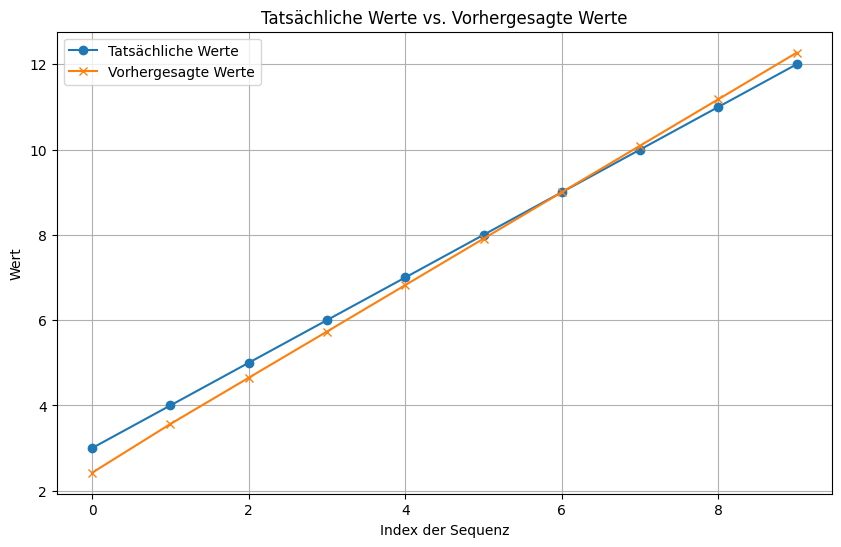

In [3]:
import matplotlib.pyplot as plt

# Grafische Darstellung der Sequenzen und Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(y, label='Tatsächliche Werte', marker='o')
plt.plot(y_pred.flatten(), label='Vorhergesagte Werte', marker='x')

plt.title('Tatsächliche Werte vs. Vorhergesagte Werte')
plt.xlabel('Index der Sequenz')
plt.ylabel('Wert')
plt.legend()
plt.grid(True)
plt.show()

Erklärung des Codes:

- SimpleRNN: Der Kernbaustein des Modells, der die Sequenzen verarbeitet.
- Dense-Schicht: Die letzte Schicht, die eine Ausgabe liefert.
- Input Shape: Die Eingabedaten haben eine dreidimensionale Form: [Batchgröße, Zeitstufen, Features].

Aufgabe:

- Modifizieren Sie das Beispiel, um eine längere Sequenz oder eine komplexere Aufgabe zu lösen.
- Beobachten Sie, wie sich die Vorhersagen ändern.


### Go On!!

Best Practice für Recurren Neutral Netowrks:

Wie kann man die Layers mit den Anzahl der Neuronen bestimmen? 

Wieviele Layers sollte man haben? 

### Best Practices for Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are powerful architectures designed to handle sequential data such as time series, text, or any data with temporal dependencies. Building an effective RNN model requires careful consideration of several factors, such as determining the number of layers, selecting the number of neurons per layer, and tuning the network for optimal performance. Below are the best practices that address your key questions.

1. How to Determine the Layers and Number of Neurons in an RNN?

Choosing the number of layers and neurons (units) in an RNN largely depends on the complexity of the problem, the dataset size, and the type of task (e.g., sequence generation, classification, or time series forecasting). Here are some key factors to consider:

- Start with a Single Layer and Few Neurons: When working with RNNs, it’s a good practice to start with a small number of neurons (e.g., 32 or 64) and a single layer to test if the model captures the essential sequential dependencies in the data.

- Increasing Neurons Gradually: As the model complexity increases, consider gradually increasing the number of neurons. Common choices are 32, 64, 128, 256, or 512 neurons, but it's best to avoid using too many neurons initially to prevent overfitting.

- Number of Neurons: In general, the number of neurons (units) in each RNN layer should relate to the complexity of the input data:

    - Low complexity tasks (e.g., short time series) might perform well with 32 or 64 neurons.
    - Medium complexity tasks (e.g., longer sequences or text data) typically need 128 to 256 neurons.
    - High complexity tasks (e.g., long-term sequence dependencies, large datasets) may require more neurons, but it’s important to regularize the model properly to avoid overfitting.

- Tradeoff Between Model Size and Training Time: Increasing the number of neurons improves the model’s ability to capture complex patterns, but it also increases the training time and risk of overfitting. Use cross-validation or an early stopping mechanism to ensure you're not overfitting when experimenting with more neurons.



2. How Many Layers Should an RNN Have?

- Start with One Layer: Simple tasks often work well with a single recurrent layer. For many tasks, this is a good starting point to see how well the RNN captures temporal dependencies.

- Adding Layers: If a single-layer RNN isn’t performing well (e.g., the model underfits or cannot capture long-term dependencies), consider adding more recurrent layers. A common approach is to use 2–3 layers. For example:

    - Shallow RNNs (1-2 layers): Perform well for short sequences or simple patterns.
    - Deep RNNs (3-4 layers): Needed for more complex tasks like sequence prediction or tasks requiring deeper temporal understanding.

Tip: Add layers progressively and monitor the performance (training/validation loss, accuracy). Going beyond 3-4 layers usually offers diminishing returns unless the task demands it.

- Stacking RNN Layers: When stacking multiple RNN layers, each subsequent layer takes the hidden state output of the previous layer as its input. This helps the model learn more abstract patterns from the sequence data.

- Use of Variants: In many cases, Long Short-Term Memory (LSTM) or Gated Recurrent Units (GRU), which are advanced variants of RNN, are used instead of vanilla RNNs, as they help in capturing longer-term dependencies by overcoming the vanishing gradient problem.

    - LSTM is ideal when you need to remember information over long sequences.
    - GRU is a simplified version of LSTM and works well when you need faster training but still require memory over time.




3. When to Use Dropout or Regularization Techniques?

- Dropout Regularization: RNNs, especially deep ones, can overfit quickly because of their complexity. Add dropout layers (typically between RNN layers or on the output of the recurrent layers) to regularize the network and prevent overfitting.

In [7]:
from tensorflow.keras.layers import LSTM, Dropout

# Erstellen des LSTM-Modells
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),  # LSTM layer
    Dropout(0.2),  # Dropout layer with 20% drop rate
    Dense(1)  # Output layer
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='mse')

# Modell-Training
model.fit(X, y, epochs=200, verbose=0)

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
Vorhersage: [ 1.1114697  1.9508017  2.9961374  4.2159824  5.568365   7.0035744
  8.476575   9.952462  11.407353  12.827662 ]


4. Handling Sequence Length and Input Shape

- Input Shape: The input shape for RNNs is typically (batch_size, timesteps, features), where:

    - batch_size: The number of sequences fed into the network per training iteration.
    - timesteps: The number of time steps in each sequence (e.g., number of words in a sentence or number of days in a time series).
    - features: The number of features at each time step (e.g., 1 for univariate, multiple for multivariate data).

Tip: You may need to pad your sequences if they have variable lengths (e.g., when dealing with natural language data).

- Sequence Length: Choose a sequence length based on the task. If the sequences are too long and the model fails to converge, consider:

    - Truncating sequences or using sliding windows to capture dependencies.
    - Using architectures like LSTM or GRU, which are more suitable for long sequences.




5. Optimizing and Training the RNN

- Choosing Optimizers: The Adam optimizer is generally recommended for RNNs as it adapts the learning rate during training and is computationally efficient.

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Modell-Training
model.fit(X, y, epochs=200, verbose=0)

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")

c:\Users\geise\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Vorhersage: [ 1.1114697  1.9508017  2.9961374  4.2159824  5.568365   7.0035744
  8.476575   9.952462  11.407353  12.827662 ]


- Batch Size and Epochs:

    - Start with batch sizes like 32 or 64, but for large datasets, you might need to experiment with larger batches.
    - Use early stopping to monitor overfitting and prevent the model from training too long. Typically, 10–50 epochs are sufficient, but this varies based on the complexity of the task.

- Gradient Clipping: RNNs can suffer from exploding gradients, especially in long sequences. Use gradient clipping to limit the gradient values to a specific range, avoiding excessively large updates.

In [11]:
from tensorflow.keras.optimizers import Adam

# Use gradient clipping with Adam optimizer
optimizer = Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Modell-Training
model.fit(X, y, epochs=200, verbose=0)

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
Vorhersage: [ 1.1114697  1.9508017  2.9961374  4.2159824  5.568365   7.0035744
  8.476575   9.952462  11.407353  12.827662 ]


### 4. Erweiterung: LSTMs und GRUs

Ziel: Weiterentwicklungen von RNNs verstehen.

Inhalt:
- Long Short-Term Memory (LSTM):

    - LSTMs sind eine spezielle Art von RNN, die das Problem des "Vanishing Gradient" lösen können.
    - Sie nutzen "Gates", um zu entscheiden, welche Informationen behalten oder vergessen werden.

- Gated Recurrent Unit (GRU):

    - GRUs sind ähnlich wie LSTMs, aber etwas einfacher, da sie weniger Parameter haben.



Beispiel-Code für ein LSTM-Modell:

In [12]:
from tensorflow.keras.layers import LSTM

# LSTM-Modell statt SimpleRNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])

# Kompilieren und trainieren
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


In [14]:

# Vorhersagen auf Basis des trainierten Modells
y_pred = model.predict(X)
print(f"Vorhersage: {y_pred.flatten()}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Vorhersage: [ 1.5446539  2.638945   3.8774192  5.202369   6.5526085  7.874262
  9.125841  10.279277  11.318736  12.238543 ]


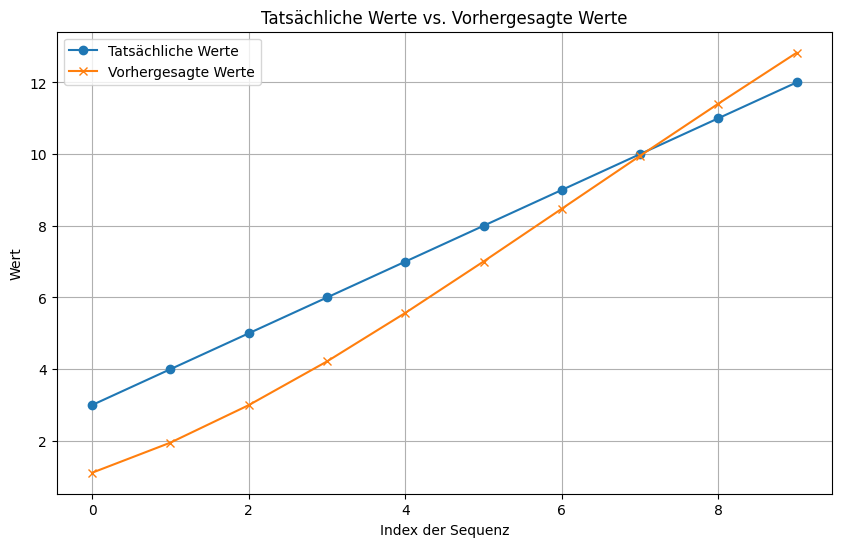

In [13]:
import matplotlib.pyplot as plt

# Grafische Darstellung der Sequenzen und Vorhersagen
plt.figure(figsize=(10, 6))
plt.plot(y, label='Tatsächliche Werte', marker='o')
plt.plot(y_pred.flatten(), label='Vorhergesagte Werte', marker='x')

plt.title('Tatsächliche Werte vs. Vorhergesagte Werte')
plt.xlabel('Index der Sequenz')
plt.ylabel('Wert')
plt.legend()
plt.grid(True)
plt.show()

5. Zusammenfassung und Fragen

Ziel: Eine Wiederholung der Kernkonzepte und Klärung von Fragen.

Inhalt:

- Zusammenfassung der wichtigsten Konzepte:
    - RNNs und ihre Rolle bei der Verarbeitung von Sequenzdaten.
    - Implementierung eines einfachen RNNs in TensorFlow.
    - Unterschied zwischen RNN, LSTM und GRU.

Diskussionsfragen:

- Wo könnten Sie RNNs in realen Anwendungen einsetzen?
- Welche Probleme haben RNNs bei langen Sequenzen?